In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files_1 = glob.glob("/content/drive/MyDrive/ASSIGNMENT_2/class1_images/*.png")
files_2 = glob.glob("/content/drive/MyDrive/ASSIGNMENT_2/class2_images/*.png")
files_3 = glob.glob("/content/drive/MyDrive/ASSIGNMENT_2/class3_images/*.png")
print("Number of images in files_1 are: ", len(files_1))
print("Number of images in files_2 are: ", len(files_2))
print("Number of images in files_3 are: ", len(files_3))
print("Total images are: ",len(files_1)+len(files_2)+len(files_3))

Number of images in files_1 are:  237
Number of images in files_2 are:  252
Number of images in files_3 are:  231
Total images are:  720


In [ ]:
from PIL import Image

In [ ]:
img = files_1[5]
imga = plt.imread(img)
shape = imga.shape
print(shape)

(656, 875, 3)


In [ ]:
ig = Image.open(files_1[5])
print("size of img is: ",ig.size)
ig = ig.resize((437,328),Image.ANTIALIAS)
print("size of resized img is: ", ig.size)
I = np.array(ig)
print("shape of arr is: ",I.shape)

size of img is:  (875, 656)
size of resized img is:  (437, 328)
shape of arr is:  (328, 437, 3)


In [ ]:
X_train = []
y_train = []
for myfile in files_1:
  img = Image.open(myfile)
  img = img.resize((shape[1]//2, shape[0]//2), Image.ANTIALIAS)
  I = np.array(img)/255
  X_train.append(I)
  y_train.append(1)

for myfile in files_2:
  img = Image.open(myfile)
  img = img.resize((shape[1]//2, shape[0]//2), Image.ANTIALIAS)
  I = np.array(img)/255
  X_train.append(I)
  y_train.append(2)

for myfile in files_3:
  img = Image.open(myfile)
  img = img.resize((shape[1]//2, shape[0]//2), Image.ANTIALIAS)
  I = np.array(img)
  X_train.append(I)
  y_train.append(3)

In [ ]:
X_train = np.array(X_train, dtype = 'float32')
y_train = np.array(y_train, dtype = 'uint8')

In [ ]:
print(X_train.dtype)
print(y_train.dtype)

float32
uint8


In [ ]:
y_train = y_train.reshape(720, 1)
print("shape of X_train is: ", X_train.shape)
print("shape of y_train is: ",y_train.shape)

shape of X_train is:  (720, 328, 437, 3)
shape of y_train is:  (720, 1)


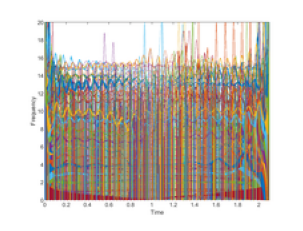

In [ ]:
plt.figure()
plt.axis('off')
plt.imshow(X_train[5])                 # plt.imshow(X_train[0][:590, 110:, :]) -- incase we need to crop figure
plt.show()

In [ ]:
import h5py

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125)
print("X_train shape is: ", X_train.shape)
print("y_train shape is: ", y_train.shape)
#print("X_val shape is: ",X_val.shape)
#print("y_val shape is: ",y_val.shape)
print("X_test shape is: ", X_test.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (576, 328, 437, 3)
y_train shape is:  (576, 1)
X_test shape is:  (144, 328, 437, 3)
y_test shape is:  (144, 1)


In [ ]:
#f1 = h5py.File("/content/drive/MyDrive/ASSIGNMENT_2/ques_10_data1.h5", "w")
#f1.create_dataset("X_train", data = X_train)
#f1.create_dataset("X_val", data = X_val)
#f1.create_dataset("X_test", data = X_test)
#f1.create_dataset("y_train", data = y_train)
#f1.create_dataset("y_val", data = y_val)
#f1.create_dataset("y_test", data = y_test)
#f1.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, AveragePooling2D, Activation
from tensorflow.keras.regularizers import L2, L1

In [ ]:
def cnn_model(input_shape):
  model = Sequential()
  model.add(Conv2D(60, kernel_size = (7,11), strides = (3,4), activation = 'relu',input_shape = input_shape, name = 'Conv2D_1'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size = (3,3), strides = (2,2), name = 'MaxPool2D_1'))

  model.add(Conv2D(120, kernel_size = (3,3), strides = (2,2), activation = 'relu',name = 'Conv2D_2'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size = (3,3), strides = (2,2), name = 'MaxPool2D_2'))

  model.add(Conv2D(120, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv2D_3'))
  model.add(BatchNormalization())
  model.add(Conv2D(200, kernel_size = (3,3), padding = 'same', activation = 'relu', name = 'Conv2D_4'))

  model.add(Conv2D(300, kernel_size = (3,3), padding= 'same', activation = 'relu', name = 'Conv2D_5'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size = (3,3), strides = (2,2), name = 'MaxPool2D_3'))

  model.add(Flatten())

  model.add(Dense(2500, activation = 'relu' ,name = 'Dense_1'))
  #model.add(Dropout(0.1))
  model.add(BatchNormalization())

  model.add(Dense(1000, activation = 'relu',name = 'Dense_2'))
  #model.add(Dropout(0.1))
  model.add(BatchNormalization())


  model.add(Dense(500, activation = 'relu' ,name = 'Dense_3'))
  #model.add(Dropout(0.1))
  model.add(BatchNormalization())


  model.add(Dense(50, activation = 'relu' ,name = 'Dense_4'))
  #model.add(Dropout(0.1))
  model.add(BatchNormalization())


  model.add(Dense(4, activation = 'softmax', name = 'Dense_5'))
  #model.add(Dropout(0.1))
  model.add(BatchNormalization())


  return model

In [ ]:
#### summary of the model
model = cnn_model((X_train[0].shape))

In [ ]:
print("summary of model is: ")
model.summary()

summary of model is: 
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 108, 107, 60)      13920     
_________________________________________________________________
batch_normalization_123 (Bat (None, 108, 107, 60)      240       
_________________________________________________________________
MaxPool2D_1 (MaxPooling2D)   (None, 53, 53, 60)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 26, 26, 120)       64920     
_________________________________________________________________
batch_normalization_124 (Bat (None, 26, 26, 120)       480       
_________________________________________________________________
MaxPool2D_2 (MaxPooling2D)   (None, 12, 12, 120)       0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (N

In [ ]:
### compiling the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
### callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 50, restore_best_weights = True)

In [ ]:
### training the model
history = model.fit(X_train, y_train, batch_size = 128, epochs = 100, validation_split = 0.125, callbacks = [callback], verbose = 0)

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 23ms/step - loss: 0.2393 - accuracy: 0.9792


[0.23929733037948608, 0.9791666865348816]